# **Employee Attrition Prediction: Using Machine Learning to Forecast Churn**

This project focuses on building predictive models to help the Human Resources (HR) department of Salifort Motors understand and forecast employee attrition. The goal is to identify key factors influencing why employees leave the company and to provide data-driven insights that can be used to improve retention and strategic workforce planning.

### Project Goals

* **Explore the data** to understand key variables and their relationships to employee attrition.
* **Build and evaluate classification models** to accurately predict which employees are most likely to leave.
* **Identify the key drivers of attrition** to provide actionable business recommendations to HR.

### Data Description

The analysis uses a dataset containing 14,999 rows and 10 columns of employee-related data. Few key variables include employee satisfaction, evaluation scores, number of projects, monthly working hours, tenure, and department.

This dataset was sourced from a public [Kaggle repository](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    f1_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report, 
    roc_auc_score, 
    roc_curve
)

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understanding the variables
- Cleaning the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, renamed the columns as needed. Standardized the column names so that they are all in `snake_case`, corrected any column names that are misspelled, and made column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours': 'average_monthly_hours', 
                            'time_spend_company': 'tenure', 
                            'Work_accident': 'work_accident', 
                            'Department': 'department'}
                )

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df.shape

(11991, 10)

### Check outliers

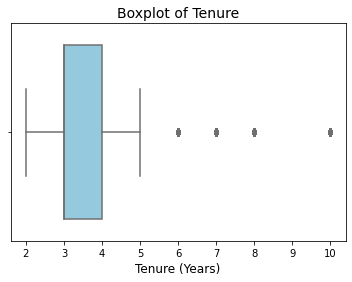

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['tenure'], color='skyblue')
plt.title('Boxplot of Tenure', fontsize = 14)
plt.xlabel('Tenure (Years)', fontsize = 12)
plt.show()

In [12]:
# Determine the number of rows containing outliers
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['tenure'] < lower_limit) | (df['tenure'] > upper_limit)]

len(outliers)

824

Outlier handling was applied  later to minimize the impact of extreme values on models sensitive to them.

# Exploratory Data Analysis: Analyze relationships between variables



Began by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

print()

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True) * 100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Examined the key variables of interest and created plots to visualize their relationships.

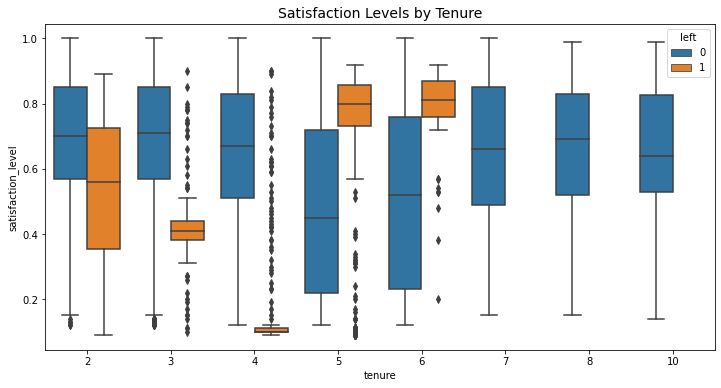

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='tenure',
    y='satisfaction_level',
    hue='left'
    )
plt.title('Satisfaction Levels by Tenure', fontsize=14) 
plt.show()

left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64
left
0    0.69
1    0.41
Name: satisfaction_level, dtype: float64



Text(0.5, 1.0, 'Tenure histogram')

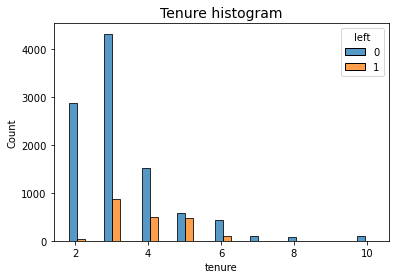

In [15]:
print(df.groupby(['left'])['satisfaction_level'].mean())
print(df.groupby(['left'])['satisfaction_level'].median())

print()

sns.histplot(data=df, x='tenure', hue='left', multiple = 'dodge', shrink=5)
plt.title('Tenure histogram', fontsize='14')

Text(0.5, 1.0, 'Salary by tenure: long-tenured people')

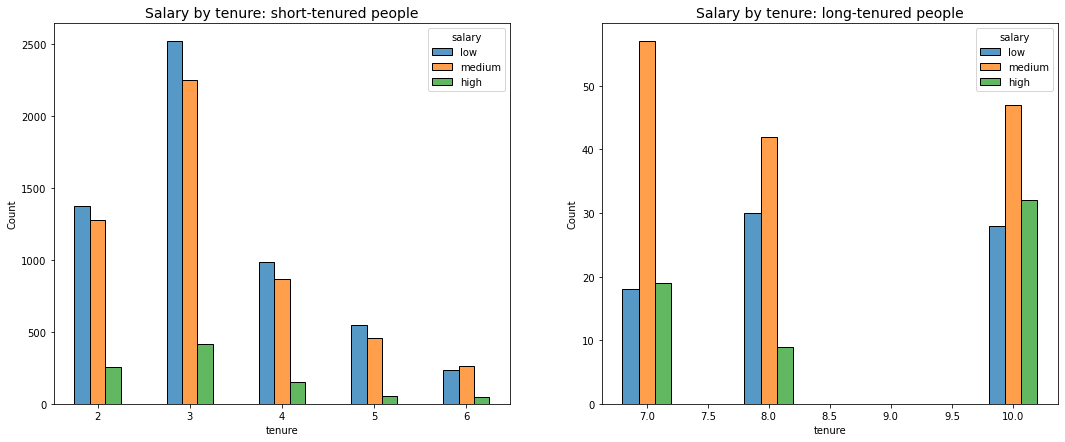

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,7)) 
short_tenure = df[df['tenure'] < 7]
long_tenure = df[df['tenure'] > 6]

sns.histplot(
    data=short_tenure,
    x='tenure',
    hue='salary',
    discrete=1, ## tells Seaborn that x-values are integers (discrete values), not continuous. Without this, Seaborn might bin tenure into ranges, but with discrete=True, each integer year gets its own bar ##
    hue_order=['low', 'medium', 'high'],
    multiple='dodge',
    shrink=0.5,
    ax=ax[0]
    )

sns.histplot(
    data=long_tenure,
    x='tenure',
    hue='salary',
    discrete=1,
    hue_order=['low', 'medium', 'high'],
    multiple='dodge',
    shrink=0.4,
    ax=ax[1]
    )

ax[0].set_title('Salary by tenure: short-tenured people', fontsize='14')
ax[1].set_title('Salary by tenure: long-tenured people', fontsize='14')

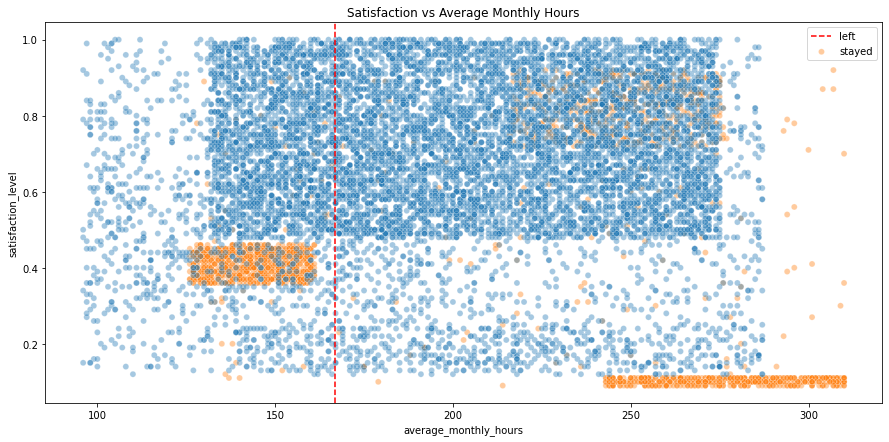

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(
    data=df,
    x='average_monthly_hours',
    y='satisfaction_level',
    hue='left',
    alpha=0.4
    )
plt.axvline(x=166.7, color='r', ls='--')
plt.title("Satisfaction vs Average Monthly Hours") 
plt.legend(labels=['left', 'stayed'])
plt.show()

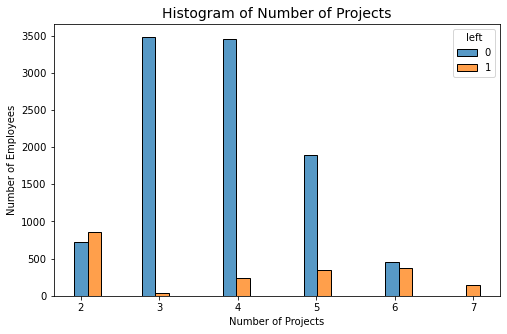

In [18]:
plt.figure(figsize = (8,5))
sns.histplot(
    data = df,
    x = 'number_project',
    hue = 'left',
    shrink = 2,
    multiple = 'dodge'
    )
plt.title("Histogram of Number of Projects", fontsize=14) 
plt.xlabel("Number of Projects") 
plt.ylabel("Number of Employees")
plt.show()

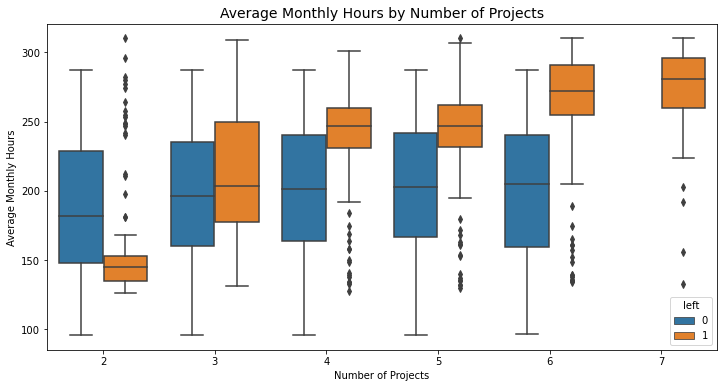

1    145
Name: left, dtype: int64


In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='number_project',
    y='average_monthly_hours',
    hue='left'
    )

plt.title("Average Monthly Hours by Number of Projects", fontsize=14) 
plt.xlabel("Number of Projects") 
plt.ylabel("Average Monthly Hours")
plt.legend(title='left')
plt.show()

print(df[df['number_project'] == 7]['left'].value_counts())

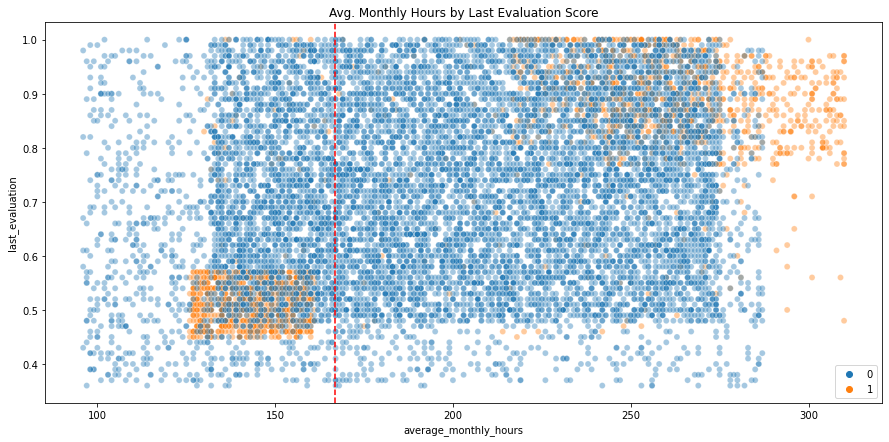

In [20]:
plt.figure(figsize = (15,7))
sns.scatterplot(
    data=df,
    x='average_monthly_hours',
    y='last_evaluation',
    hue='left',
    alpha=0.4
    )
plt.axvline(x=166.7, color='r', ls='--')
plt.title('Avg. Monthly Hours by Last Evaluation Score')
plt.legend()
plt.show()

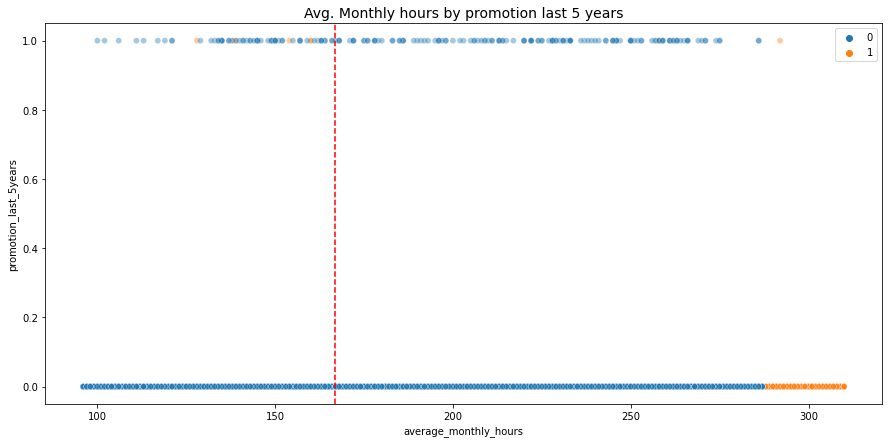

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(
    data=df,
    x='average_monthly_hours',
    y='promotion_last_5years',
    hue='left',
    alpha = 0.4
    )
plt.axvline(x=166.7, color='r', ls='--')
plt.title('Avg. Monthly hours by promotion last 5 years', fontsize='14')
plt.legend()
plt.show();

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64


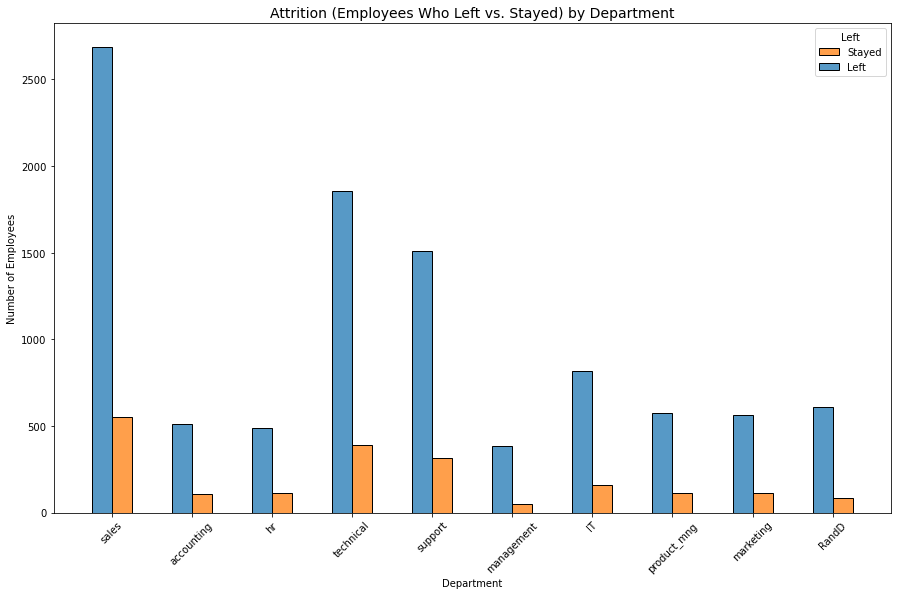

In [22]:
print(df['department'].value_counts())

plt.figure(figsize = (15,9))
sns.histplot(
    data=df,
    x='department',
    hue='left',
    discrete=1,
    hue_order=[0,1],
    multiple='dodge',
    shrink=0.5,
    )
plt.title('Attrition (Employees Who Left vs. Stayed) by Department', fontsize=14)
plt.xlabel('Department')
plt.xticks(rotation='45')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show();

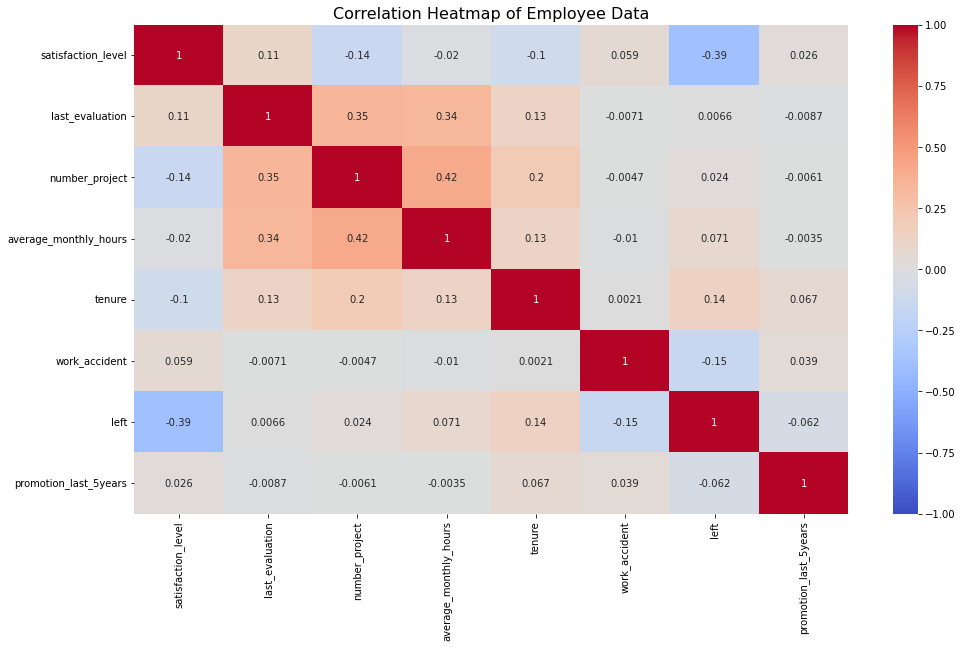

In [23]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Employee Data", fontsize=16) 
plt.show();

### Insights

1) Employees who left were mostly either dissatisfied with short tenures or highly satisfied with medium tenures. Notably, four-year employees showed unusually low satisfaction, suggesting possible policy effects. The longest-tenured employees stayed, with satisfaction similar to newer stayers.

The histogram shows that few employees have long tenures, and these are more likely to be higher-ranking and higher-paid. 

As expected, employees who left had lower mean and median satisfaction scores than those who stayed. Among the employees who stayed, the mean was slightly below the median, suggesting  a left-skew in their satisfaction levels. A left-skew means most employees report moderate to high satisfaction, but a small group with very low satisfaction pulls the average down below the median.

But, the following two side-side historam plots indicate that employees who worked at the company for a long time did not mostly belong to the high-salary group (long-tenured employees are spread across low, medium, and high salary levels in roughly normal proportions). 

Even though we might expect long-tenured employees to mostly be high-ranking, high-paid staff, the side-by-side histograms show that’s not the case. So, staying longer at the company doesn’t necessarily mean moving into higher-paid roles. As some employees stayed a long time even with low or medium salaries, suggesting that other factors such as their working hours or number of projects, may have influenced their decision to stay.

2) Assuming a standard 40-hour work week with two weeks’ vacation, employees average working hours is ~ 166.7 hours per month. The scatterplot shows three distinct groups: Employees working approximately 240 - 315 hours/month (75+ hours/week) had very low satisfaction (near zero), which likely contributed to their leaving. Another group who left worked considerably normal hours (~ 125 to 170 hours/month), but their satisfaction was still low (~ 0.4), possibly due to pressure from seeing peers work much more. A third group worked ~ 210 to 275 hours/month and reported higher satisfaction (~ 0.7 - 0.9).

3) From the histogram of number of projects, it appears that employees working on 3 to 4 projects are the most stable group. In this range, the proportion of employees who left compared to those who stayed is very low.

4) Employees handling more projects also tend to log more hours, with average monthly hours rising alongside project count. Two clear groups of employees who left stand out: (a) those working far fewer hours than their peers with the same number of projects (often < 155 hours/month), possibly reflecting terminations or notice periods, and (b) those working much longer hours (~250 to 300 hours/month), likely leading to burnout and voluntary exits. Strikingly, 100% of employees with 7 projects left, and those with 6 - 7 projects had interquartile ranges of ~255 to 295 hours/month (well above other groups). Most of the employees here are overworked.

5) The scatterplot shows two groups of employees who left: overworked high performers and lower-rated employees working slightly below the 167-hour monthly average. While long hours often correlate with higher evaluations, they don’t guarantee good scores. Most employees work well above 167 hours per month.

6) Few promoted employees left the company, and those who worked the longest hours were rarely promoted. Among those who left, most had been working the longest hours.

7) The proportion of employees who left vs. stayed looks pretty similar across all of the departments. So, attrition doesn’t seem to be concentrated in (or strongly correlated to) any specific department, the issue is more company-wide.

8) The correlation heatmap shows that number of projects, monthly hours, and evaluation scores tend to increase together (positively correlated), indicating that employees with heavier workloads often receive higher evaluations. Employee attrition is negatively correlated with satisfaction, suggesting that more satisfied employees are less likely to leave. These insights highlight the importance of monitoring workload and satisfaction to reduce turnover.

Summary:

Employees seem to leave due to high workloads and low satisfaction, often juggling many projects and long hours without sufficient recognition. This pattern suggests poor management and a risk of burnout among a notable segment of staff. Interestingly, employees who have been with the company for more than six years tend to stay, indicating retention improves with tenure.

### The types of models most appropriate for this task:

The goal is to predict whether an employee leaves (categorical outcome variable), which is a binary classification problem: 1 means the employee left, 0 means they stayed. Since the target variable (employee attrition) is categorical, it can be predicted using Logistic Regression or a tree-based machine learning model.

## Modeling Approach: Logistic Regression Model

#### Logistic Regression model assumptions

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

### Dummy variables

In [24]:
df_enc = df.copy()

df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)
                    
df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Correlation between variables

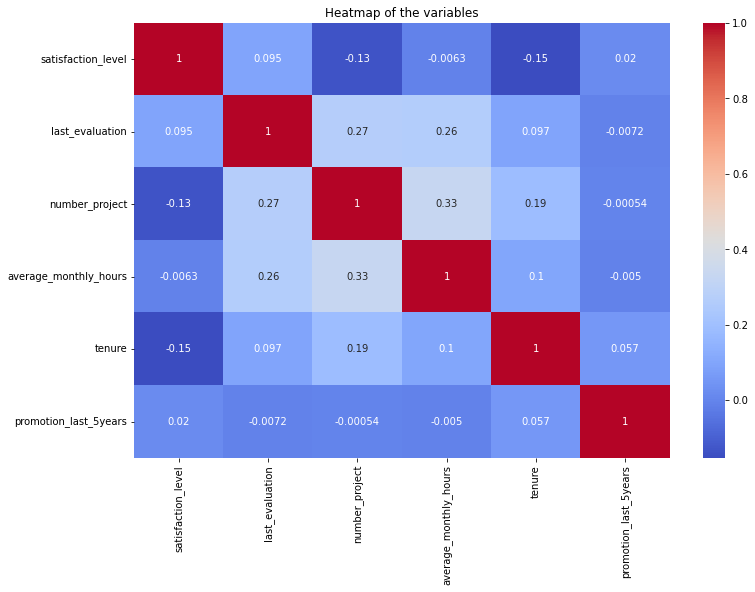

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'promotion_last_5years']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the variables')
plt.show()

#### No multicollinearity assumption is met.

Even if initial analysis shows a weak effect, visualizing employee counts across departments helps confirm patterns from the data. This step is exploratory, not strictly required for logistic regression, but it aids in communicating insights and justifying feature selection, even if department is not a strong predictor.

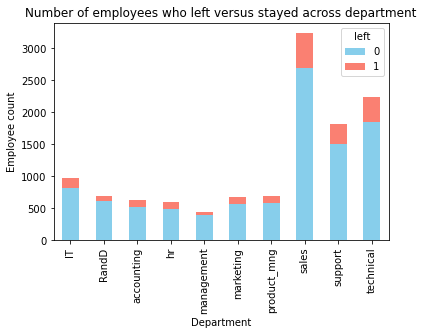

In [26]:
pd.crosstab(df['department'], df['left']).plot(kind ='bar',color=['skyblue', 'salmon'], stacked=True)
plt.title('Number of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

### Handling Outliers

In [27]:
df_norm = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Build the model

In [28]:
y = df_norm['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [29]:
X = df_norm.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [31]:
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

### Test the model for evaluation

In [32]:
y_pred = clf.predict(X_test)

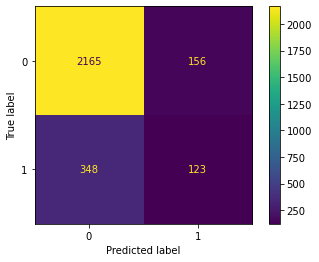

In [33]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

disp.plot(values_format='')

plt.show()

A confusion matrix shows how well a model predicts outcomes.

- **True Negatives** (top-left): People who stayed and were correctly predicted to stay. 

- **False Positives** (top-right): People who stayed but were incorrectly predicted to leave. 

- **False Negatives** (bottom-left): People who left but were incorrectly predicted to stay. 

- **True Positives** (bottom-right): People who left and were correctly predicted to leave.

#### Check the class balance of the outcome variable

This helps determine whether accuracy is a reliable metric and whether we should consider alternatives like precision, recall, or F1-score, which are more informative for imbalanced data.

In [34]:
df_norm['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The classes are roughly 83%-17%, so the imbalance is mild and we can proceed without changes.

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

The logistic regression model has an overall accuracy of 82%, precision of 79%, recall of 82%, f1-score of 80% (all weighted averages) but its ability to identify employees who leave (the key group of interest) is lower, indicating the model may miss some at-risk employees.

## Modeling Approach: Tree-based Model

In [36]:
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [37]:
X = df_enc.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

### Decision tree model

In [39]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
            }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

dec_tree = GridSearchCV (tree, cv_params, scoring = scoring, cv=4, refit='roc_auc', n_jobs=-1)

ROC AUC measures the model’s overall ability to distinguish between classes, considering both positives and negatives and independent of a classification threshold. Unlike precision or recall, which focus on one class (positive class:left(1)), ROC AUC provides a balanced evaluation, making it especially useful for imbalanced datasets.

In [40]:
%%time

dec_tree.fit(X_train, y_train)

CPU times: user 609 ms, sys: 440 ms, total: 1.05 s
Wall time: 16.9 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                  

In [41]:
dec_tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [42]:
dec_tree.best_score_

0.969819392792457

This high AUC score shows that this decision tree model predicts employees who will leave effectively.

In [43]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name:str - what you want the model to be called in the output table (your choice)
    model_object - a fitted GridSearch object
    metric:str - precision, accuracy, recall, f1 or auc
    
    Returns a pandas df with precision, accuracy, f1, recall and auc scores for the model
    with the best mean 'metric' score across all validation folds.
    '''

    metric_dict = { 'precision': 'mean_test_precision',
                'recall': 'mean_test_recall',
                'accuracy': 'mean_test_accuracy',
                'f1': 'mean_test_f1',
                'roc_auc': 'mean_test_roc_auc',
               }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    accuracy = best_estimator_results.mean_test_accuracy
    f1 = best_estimator_results.mean_test_f1
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'accuracy ': [accuracy ],
                          'F1':[f1],
                          'roc_auc': [roc_auc]
                         })
    
    return table

In [44]:
dec_tree_results = make_results('Decision Tree CV', dec_tree, 'roc_auc')
dec_tree_results

,model,precision,recall,accuracy,F1,roc_auc
0,Decision Tree CV,0.914552,0.916949,0.971978,0.915707,0.969819


The decision tree model shows strong performance across all evaluation metrics. 

However, decision trees can be prone to overfitting. Random forests address this issue by aggregating predictions from multiple trees, making them a suitable next step for modeling.

### Random forest model

In [45]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [5, 10, None], 
             'max_features': [1.0], 
             'max_samples': [0.7, 1.0], 
             'min_samples_leaf': [1,2,3], 
             'min_samples_split': [2,3,4], 
             'n_estimators': [300, 500]
            }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_tree = GridSearchCV (rf, cv_params, scoring = scoring, cv=4, refit='roc_auc', n_jobs=-1)

In [46]:
## %%time
## rf_tree.fit(X_train, y_train)

### Pickling

In [47]:
path = '/home/jovyan/work/'

In [48]:
## with open (path + 'rf_tree_model.pickle', 'wb') as to_write:
##    pickle.dump(rf_tree, to_write)

In [49]:
with open (path + 'rf_tree_model.pickle', 'rb') as to_read:
    rf_tree = pickle.load(to_read)

In [50]:
rf_tree.best_score_

0.9804250949807172

In [51]:
rf_tree.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [52]:
rf_tree_cv_results = make_results('Random Forest CV', rf_tree, 'roc_auc')
results = pd.concat([dec_tree_results, rf_tree_cv_results])
results.sort_values(by=['F1'], ascending=False)

,model,precision,recall,accuracy,F1,roc_auc
0,Random Forest CV,0.950023,0.915614,0.977983,0.932467,0.980425
0,Decision Tree CV,0.914552,0.916949,0.971978,0.915707,0.969819


The random forest outperforms the decision tree on most metrics, with recall only slightly lower by 0.001 (essentially negligible). Overall, the random forest is the better model. 

Next, evaluate the champion model on the test set.

In [53]:
def get_test_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Arguments:
    model_name:str - what you want the model to be called in the output table (your choice)
    model - A fitted GridSearchCV object
    X_test_data - numpy array of X_test data
    y_test_data - numpy array of y_test data
    
    Returns a pandas df of precision, accuracy, f1, recall and auc scores for the model
    '''
    preds = model.best_estimator_.predict(X_test_data)
    
    precision = precision_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    roc_auc = roc_auc_score(y_test_data, preds)
    
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'accuracy ': [accuracy ],
                          'F1':[f1],
                          'roc_auc': [roc_auc]
                         })
    
    return table

In [54]:
rf_tree_test_results = get_test_scores('Random Forest test', rf_tree, X_test, y_test)
rf_tree_test_results

,model,precision,recall,accuracy,F1,roc_auc
0,Random Forest test,0.964211,0.919679,0.980987,0.941418,0.956439


The test scores are similar to the validation scores, indicating a strong model. This suggests the model is likely to perform well on new, unseen data.

### Feature Engineering and Data Leakage 

The high evaluation scores may be partly due to data leakage, which occurs when the model uses information during training that wouldn’t be available in a real-world scenario. This can include features present in the test set or data that wouldn’t exist at the time of prediction, leading to overly optimistic performance. In this dataset, columns like satisfaction_level and average_monthly_hours could leak information, as employees who have decided to leave may already show lower satisfaction or fewer hours worked. 

#### Next Steps 

To address this, the next modeling round will involve feature engineering. For example, satisfaction_level can be dropped, and a new binary feature, overworked, can be created to capture whether an employee is working unusually long hours. This approach aims to build a more realistic and robust model.

In [55]:
df_new = df_enc.drop('satisfaction_level', axis = 1)
df_new.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
df_new['overworked'] = df_new['average_monthly_hours']

print(df_new['overworked'].max())
print(df_new['overworked'].min())

310
96


The average monthly hours for a standard 8-hour, 5-day workweek is roughly 166.67 hours. Employees working more than 175 hours per month can be considered overworked.

In [57]:
df_new['overworked'] = np.where(df_new['average_monthly_hours'] > 175, 1, 0)
df_new['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [58]:
df_new = df_new.drop('average_monthly_hours', axis = 1)
df_new.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


###  Build the model

In [59]:
y = df_new['left']

In [60]:
X = df_new.drop('left', axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

#### Decision tree model with engineered features

In [62]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
            }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

dec_tree_2 = GridSearchCV (tree, cv_params, scoring = scoring, cv=4, refit='roc_auc', n_jobs=-1)

In [63]:
%%time
dec_tree_2.fit(X_train, y_train)

CPU times: user 405 ms, sys: 26.4 ms, total: 432 ms
Wall time: 1.61 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                  

In [64]:
dec_tree_2.best_score_

0.9586752505340426

In [65]:
dec_tree_2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

This model performs strongly even without including 'satisfaction_level' and detailed 'average_monthly_hours' data. This suggests that other features capture enough information to accurately predict employee turnover.

In [66]:
dec_tree_2_results = make_results('DecisionTreeCV_v2', dec_tree_2, 'roc_auc')

print(dec_tree_2_results)

print()

print(dec_tree_results)

               model  precision    recall  accuracy         F1   roc_auc
0  DecisionTreeCV_v2   0.856693  0.903553   0.958523  0.878882  0.958675

              model  precision    recall  accuracy         F1   roc_auc
0  Decision Tree CV   0.914552  0.916949   0.971978  0.915707  0.969819


Some metrics decreased, which is expected since fewer features were included in this round of the model. Despite this, the model continues to perform well, indicating that the remaining features capture the key signals needed for accurate predictions. This suggests that the model is robust even when relying on a more limited set of features.

#### Random forest model with engineered features

In [67]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [5, 10, None], 
             'max_features': [1.0], 
             'max_samples': [0.7, 1.0], 
             'min_samples_leaf': [1,2,3], 
             'min_samples_split': [2,3,4], 
             'n_estimators': [300, 500]
            }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_tree_2 = GridSearchCV (rf, cv_params, scoring = scoring, cv=4, refit='roc_auc', n_jobs=-1)

In [68]:
## %%time
## rf_tree_2.fit(X_train, y_train)

In [69]:
path = '/home/jovyan/work/'

In [70]:
## with open (path + 'rf_tree_model_v2.pickle', 'wb') as to_write:
##    pickle.dump(rf_tree_2, to_write)

In [71]:
with open (path + 'rf_tree_model_v2.pickle', 'rb') as to_read:
    rf_tree_2 = pickle.load(to_read)

In [72]:
rf_tree_2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [73]:
rf_tree_2.best_score_

0.9648100662833985

In [74]:
rf_tree_cv_v2_results = make_results('RandomForestCV_v2', rf_tree_2, 'roc_auc')

print(rf_tree_cv_v2_results)
print()
print(dec_tree_2_results)

               model  precision    recall  accuracy         F1  roc_auc
0  RandomForestCV_v2   0.866758  0.878754   0.957411  0.872407  0.96481

               model  precision    recall  accuracy         F1   roc_auc
0  DecisionTreeCV_v2   0.856693  0.903553   0.958523  0.878882  0.958675


Although the scores dropped slightly, the random forest still outperforms the decision tree when considering AUC as the primary metric. This indicates that the random forest is better at distinguishing between employees who will leave and those who will stay, even with the reduced set of features. Overall, it remains the stronger and more reliable model.

Next, evaluate the champion model on the test set.

In [75]:
rf_tree_2_test_scores = get_test_scores('Random_Forest_test_v2', rf_tree_2, X_test, y_test)
rf_tree_2_test_scores

,model,precision,recall,accuracy,F1,roc_auc
0,Random_Forest_test_v2,0.870406,0.903614,0.961641,0.8867,0.938407


This final model is robust and performs consistently well, effectively predicting outcomes even with fewer features.

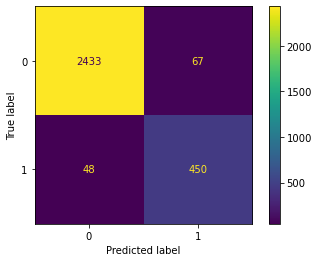

In [76]:
rf_tree_2_test_preds = rf_tree_2.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, rf_tree_2_test_preds, labels = rf_tree_2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_tree_2.classes_)

disp.plot(values_format = '')

plt.show();

The model tends to over-predict risk, flagging some employees who are actually not likely to leave or be fired. Nonetheless, it remains a strong and useful predictive tool.

#### Decision tree splits

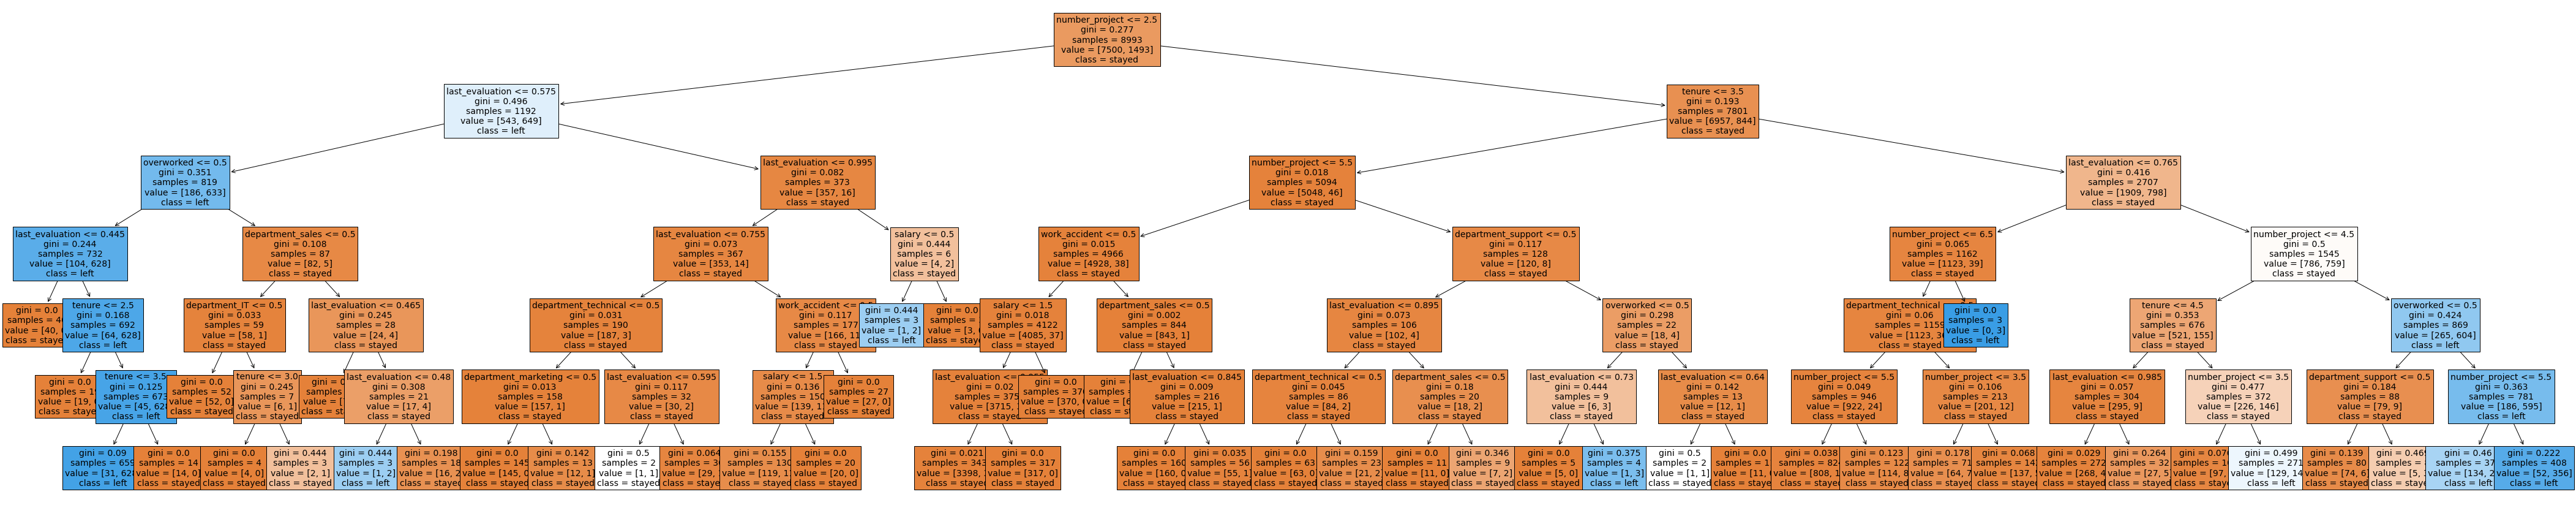

In [77]:
plt.figure(figsize=(75,15))
plot_tree(dec_tree_2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## double-click on the tree image to zoom in on the splits

#### Decision tree feature importance

In [78]:
dec_tree_2_importances = pd.DataFrame(dec_tree_2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dec_tree_2_importances = dec_tree_2_importances.sort_values(by='gini_importance', ascending=False)


dec_tree_2_importances = dec_tree_2_importances[dec_tree_2_importances['gini_importance'] != 0]
dec_tree_2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


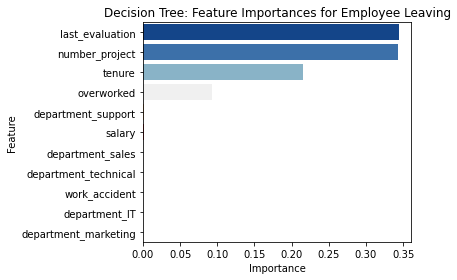

In [79]:
colors = ['#00429d', '#2a6fbb', '#7fb6d1', '#f0f0f0', '#fdae61', '#d7191c']
sns.barplot(data=dec_tree_2_importances, x="gini_importance", y=dec_tree_2_importances.index, orient='h', palette=colors)
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig('dec_tree_2_feature_importances.png', dpi=300, bbox_inches='tight') 
plt.show()

The bar plot indicates that 'last_evaluation', 'number_project', 'tenure', and 'overworked' are the most important features for predicting employee attrition (i.e. they contribute most to the model’s decisions).

### Random forest feature importance

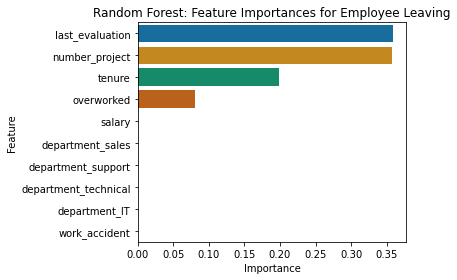

In [80]:
# Create a Series with feature importances
importances_rf_2 = pd.Series(rf_tree_2.best_estimator_.feature_importances_, index=X.columns)

# Get top 10 features
top_features = importances_rf_2.nlargest(10)

# Plot
sns.barplot(x=top_features.values, y=top_features.index, orient='h', palette='colorblind')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('rf_tree_2_feature_importances.png', dpi=300, bbox_inches='tight') 
plt.show()

The plot shows that 'last_evaluation', 'number_project', 'tenure', and 'overworked' are the most important features in the random forest model for predicting employee attrition. These top features are consistent with those identified by the decision tree model.

## Results and Evaluation

### Summary of model results

#### Logistic Regression model

The logistic regression model performed reasonably well, achieving a weighted precision of 79%, recall of 82%, f1-score of 80%, and an overall accuracy of 82% on the test set. While the results indicate that the model can generalize fairly well, it does not capture complex, non-linear relationships in the data.

#### Tree-based ML models

**Decision Tree model with engineered features:** 

Even after applying feature engineering, the decision tree model (version 2.0) showed substantially stronger predictive performance. It reached a precision of 85.7%, recall of 90.4%, f1-score of 87.9%, accuracy of 95.9%, and a ROC-AUC of 95.9% on the train set. This suggests that the model is robust even when relying on a more limited set of features.Also, highlights its ability to model non-linear patterns more effectively than logistic regression.


**Random Forest model with engineered features:**

The random forest model provided an additional performance boost, modestly outperforming the decision tree. On the test data, it achieved a precision of 87.0%, recall of 90.4%, f1-score of 88.7%, accuracy of 96.2%, and a ROC-AUC of 93.8%. This demonstrates the ensemble’s ability to generalize better and reduce overfitting compared to a single decision tree.

### Conclusion, Recommendations, Next Steps

The analysis and model insights reveal that employee attrition is primarily driven by two interconnected factors: 

- **Workload imbalance** - employees are handling too many projects and working excessive hours. 

- **Career growth and recognition gaps** - employees with around four years of tenure appear especially dissatisfied, suggesting limited promotion pathways or insufficient recognition. 

These findings suggest that addressing both workload management and long-term employee engagement is essential to improving retention.

#### Recommendations for Stakeholders 

To mitigate attrition risks, the following actions are recommended: 

- **Manage workloads effectively**: Limit the number of simultaneous projects per employee to reduce burnout. 

- **Strengthen career development**: Provide clear promotion pathways, timely recognition, and professional growth opportunities, particularly for employees with 3–5 years of tenure. Especially, provide the above mentioned to employees with four or more years of service, or investigate the root causes of dissatisfaction at this tenure milestone.

- **Compensate fairly for effort**: Ensure that long hours and overtime are properly recognized through pay, bonuses, or compensatory time off. Alternatively, reduce dependence on overtime where possible. 

- **Enhance transparency**: Communicate clearly about overtime pay, workload expectations, and time-off policies to prevent misunderstandings. 

- **Foster a supportive culture**: Encourage open dialogue through company-wide and team-level forums to surface and address concerns around workload, fairness, and recognition. 

- **Redesign evaluation criteria**: Avoid tying top performance ratings exclusively to extreme working hours (e.g., 200+ hours/month). Instead, adopt a balanced system that rewards quality, innovation, and sustainable performance.

#### Next steps

- **Test feature sensitivity**: Investigate potential data leakage by testing model performance without variables such as last_evaluation. If evaluations are infrequent or strongly influence attrition, consider reframing the prediction goal toward performance outcomes rather than retention, which might provide insights into whether attrition is a consequence of poor performance (employees pushed out) or overperformance under strain (burnout of top performers).

- **Alternative modeling**: Explore unsupervised approaches, such as K-means clustering, to identify distinct groups of employees (e.g., “overworked but high performers,” “low-satisfaction long-tenure staff”). This could provide more nuanced insights for targeted retention strategies. 

- **Safe long-term monitoring**: Build dashboards or reporting systems to track trends in workload, satisfaction, and evaluations. Use these metrics for observation and proactive HR interventions only, without feeding them into predictive models unless they are known in real time prior to an employee leaving.

- **Proactive interventions**: Use insights from models and clusters to design initiatives such as workload balancing, recognition programs, and tailored career development plans.